## Taller

Suponga un manipulador robotico con 3 grados de libertad. El brazo mide 40cm y el ante brazo mide 50cm. Los angulos de rotación no tienen restricciones. Suponga que la muñeca puede agarrar cualquier objeto que se encuentre a menos de 5cm de ella.

* Determine al menos 2 configuraciones de theta1, theta2 y theta3 que permitan alcanzar un objeto en la posición x=45, y=36, z=22. Utilice fuerza bruta para ello o cualquier estrategia objetiva para conseguirlo.

## Calificación

Los tres grupos con el mejor avance antes de finalizar la clase tendrá puntos extras en la calificación del corte, así:

* Mejor avance --> 0.3
* Segundo mejor avance --> 0.2
* Tercer mejor avance --> 0.1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Punto a alcanzar

In [10]:
punto_x = 45
punto_y = 36
punto_z = 22

In [4]:
def calcular_posicion_efector(theta1, theta2, theta3, l1, l2, l3):
    """
    Calcula la posición del efector final del brazo robótico.

    Parámetros:
    - theta1, theta2, theta3: Ángulos de las articulaciones (en radianes)
    - l1, l2, l3: Longitudes de los segmentos del brazo

    Retorna:
    - Coordenadas (x, y, z) del efector final
    """
    # Primera articulación
    x1 = l1 * np.cos(theta1)
    y1 = l1 * np.sin(theta1)
    z1 = 0  # Asumimos que la primera articulación gira en el plano horizontal

    # Segunda articulación
    x2 = x1 + l2 * np.cos(theta1) * np.cos(theta2)
    y2 = y1 + l2 * np.sin(theta1) * np.cos(theta2)
    z2 = z1 + l2 * np.sin(theta2)

    # Tercera articulación (efector final)
    x3 = x2 + l3 * np.cos(theta1) * np.cos(theta2 + theta3)
    y3 = y2 + l3 * np.sin(theta1) * np.cos(theta2 + theta3)
    z3 = z2 + l3 * np.sin(theta2 + theta3)

    return x3, y3, z3

In [5]:
def dibujar_brazo_mecanico(theta1, theta2, theta3, l1, l2, l3):
    """
    Dibuja el brazo robótico en un gráfico 3D mostrando su estructura y la posición objetivo.

    Parámetros:
    - theta1, theta2, theta3: Ángulos de las articulaciones (en radianes)
    - l1, l2, l3: Longitudes de los segmentos del brazo
    """
    # Primera articulación
    x1 = l1 * np.cos(theta1)
    y1 = l1 * np.sin(theta1)
    z1 = 0

    # Segunda articulación
    x2 = x1 + l2 * np.cos(theta1) * np.cos(theta2)
    y2 = y1 + l2 * np.sin(theta1) * np.cos(theta2)
    z2 = z1 + l2 * np.sin(theta2)

    # Tercera articulación (efector final)
    x3 = x2 + l3 * np.cos(theta1) * np.cos(theta2 + theta3)
    y3 = y2 + l3 * np.sin(theta1) * np.cos(theta2 + theta3)
    z3 = z2 + l3 * np.sin(theta2 + theta3)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Dibujar los segmentos del brazo
    ax.plot([0, x1], [0, y1], [0, z1], 'r-', linewidth=5, label='Brazo')
    ax.plot([x1, x2], [y1, y2], [z1, z2], 'g-', linewidth=5, label='Antebrazo')
    ax.plot([x2, x3], [y2, y3], [z2, z3], 'b-', linewidth=5, label='Muñeca')

    # Dibujar las articulaciones y el punto objetivo
    ax.plot([0], [0], [0], 'ko', markersize=10, label='Base')
    ax.plot([x1], [y1], [z1], 'ro', markersize=8)
    ax.plot([x2], [y2], [z2], 'go', markersize=8)
    ax.plot([x3], [y3], [z3], 'bo', markersize=10, label='Efector final')
    ax.plot([punto_x], [punto_y], [punto_z], 'mo', markersize=10, label='Objetivo')

    # Dibujar una esfera representando el rango de alcance
    u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
    radio = 5  # Radio de la esfera de alcance
    x_esf = x3 + radio * np.cos(u) * np.sin(v)
    y_esf = y3 + radio * np.sin(u) * np.sin(v)
    z_esf = z3 + radio * np.cos(v)
    ax.plot_surface(x_esf, y_esf, z_esf, color='cyan', alpha=0.2)

    # Configurar los límites y etiquetas del gráfico
    ax.set_xlim([-l1 - l2 - l3, l1 + l2 + l3])
    ax.set_ylim([-l1 - l2 - l3, l1 + l2 + l3])
    ax.set_zlim([0, l1 + l2 + l3])
    ax.set_xlabel('X (cm)')
    ax.set_ylabel('Y (cm)')
    ax.set_zlabel('Z (cm)')
    ax.set_title(f'Brazo robótico 3D - Ángulos: θ1={np.rad2deg(theta1):.1f}°, θ2={np.rad2deg(theta2):.1f}°, θ3={np.rad2deg(theta3):.1f}°')
    ax.legend()
    plt.show()

In [6]:
def calcular_distancia(pos1, pos2):
    """
    Calcula la distancia euclidiana entre dos puntos.
    """
    return np.sqrt((pos1[0] - pos2[0])**2 + (pos1[1] - pos2[1])**2 + (pos1[2] - pos2[2])**2)

In [7]:
def buscar_configuraciones(punto_objetivo, l1, l2, l3, umbral_distancia=5.0, num_pasos=20):
    """
    Busca configuraciones que permitan al brazo robótico alcanzar el punto objetivo.

    Parámetros:
    - punto_objetivo: Coordenadas (x, y, z) del punto a alcanzar
    - l1, l2, l3: Longitudes de los segmentos del brazo
    - umbral_distancia: Distancia máxima permitida para considerar que se ha alcanzado el objetivo
    - num_pasos: Número de pasos en cada ángulo para la búsqueda

    Retorna:
    - Lista de configuraciones (theta1, theta2, theta3) que alcanzan el objetivo
    """
    configuraciones_validas = []

    # Convertir punto objetivo a un array numpy
    punto_objetivo = np.array(punto_objetivo)

    # Rango de búsqueda para los ángulos (en radianes)
    paso = 2 * np.pi / num_pasos

    # Bucle anidado para la búsqueda
    for i in range(num_pasos):
        angulo_theta1 = i * paso

        for j in range(num_pasos):
            angulo_theta2 = j * paso

            for k in range(num_pasos):
                angulo_theta3 = k * paso

                # Calcular la posición del efector final
                x, y, z = calcular_posicion_efector(angulo_theta1, angulo_theta2, angulo_theta3, l1, l2, l3)
                posicion_actual = np.array([x, y, z])

                # Calcular la distancia al punto objetivo
                distancia = calcular_distancia(posicion_actual, punto_objetivo)

                # Si la distancia es menor que el umbral, guardar la configuración
                if distancia <= umbral_distancia:
                    configuraciones_validas.append((angulo_theta1, angulo_theta2, angulo_theta3, distancia))

    # Ordenar las configuraciones por distancia (menor a mayor)
    configuraciones_validas.sort(key=lambda x: x[3])

    return configuraciones_validas

In [8]:
# Parámetros del brazo robótico
longitud_brazo = 40  # l1 = 40 cm
longitud_antebrazo = 50  # l2 = 50 cm
longitud_muneca = 50  # l3 = 50 cm

# Punto objetivo
punto_objetivo = (punto_x, punto_y, punto_z)  # (45, 36, 22)

print(f"Buscando configuraciones para alcanzar el punto ({punto_x}, {punto_y}, {punto_z})...")

# Buscar configuraciones válidas
configuraciones = buscar_configuraciones(
    punto_objetivo,
    longitud_brazo,
    longitud_antebrazo,
    longitud_muneca,
    umbral_distancia=5.0,
    num_pasos=36  # 10° por paso
)

Buscando configuraciones para alcanzar el punto (45, 36, 22)...


Se encontraron 7 configuraciones válidas.

Las 5 mejores configuraciones son:

Configuración 1:
  Ángulo θ1: 40.00° (0.6981 rad)
  Ángulo θ2: 340.00° (5.9341 rad)
  Ángulo θ3: 150.00° (2.6180 rad)
  Distancia al objetivo: 3.18 cm
  Posición del efector: (42.01, 35.25, 21.20)

Configuración 2:
  Ángulo θ1: 40.00° (0.6981 rad)
  Ángulo θ2: 130.00° (2.2689 rad)
  Ángulo θ3: 210.00° (3.6652 rad)
  Distancia al objetivo: 3.18 cm
  Posición del efector: (42.01, 35.25, 21.20)

Configuración 3:
  Ángulo θ1: 40.00° (0.6981 rad)
  Ángulo θ2: 330.00° (5.7596 rad)
  Ángulo θ3: 150.00° (2.6180 rad)
  Distancia al objetivo: 4.00 cm
  Posición del efector: (44.66, 37.48, 18.30)

Configuración 4:
  Ángulo θ1: 40.00° (0.6981 rad)
  Ángulo θ2: 120.00° (2.0944 rad)
  Ángulo θ3: 210.00° (3.6652 rad)
  Distancia al objetivo: 4.00 cm
  Posición del efector: (44.66, 37.48, 18.30)

Configuración 5:
  Ángulo θ1: 220.00° (3.8397 rad)
  Ángulo θ2: 170.00° (2.9671 rad)
  Ángulo θ3: 350.00° (6.1087 rad)
  Distanci

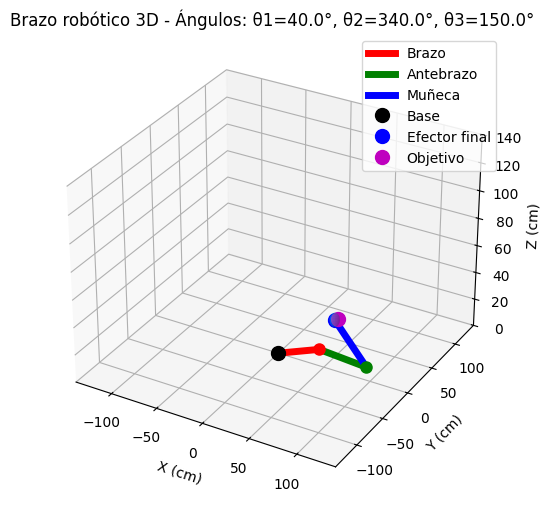


Dibujando configuración 2...


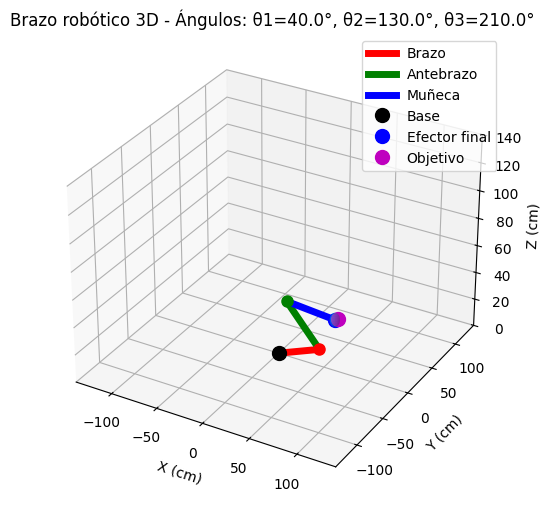

In [9]:
# Mostrar resultados
if configuraciones:
    print(f"Se encontraron {len(configuraciones)} configuraciones válidas.")
    print("\nLas 5 mejores configuraciones son:")

    for i, (theta1, theta2, theta3, dist) in enumerate(configuraciones[:5]):
        print(f"\nConfiguración {i+1}:")
        print(f"  Ángulo θ1: {np.rad2deg(theta1):.2f}° ({theta1:.4f} rad)")
        print(f"  Ángulo θ2: {np.rad2deg(theta2):.2f}° ({theta2:.4f} rad)")
        print(f"  Ángulo θ3: {np.rad2deg(theta3):.2f}° ({theta3:.4f} rad)")
        print(f"  Distancia al objetivo: {dist:.2f} cm")

        # Calcular y mostrar la posición exacta del efector final
        x, y, z = calcular_posicion_efector(theta1, theta2, theta3, longitud_brazo, longitud_antebrazo, longitud_muneca)
        print(f"  Posición del efector: ({x:.2f}, {y:.2f}, {z:.2f})")

    # Visualizar las dos mejores configuraciones
    print("\nVisualizando las dos mejores configuraciones:")
    for i, (theta1, theta2, theta3, _) in enumerate(configuraciones[:2]):
        print(f"\nDibujando configuración {i+1}...")
        dibujar_brazo_mecanico(theta1, theta2, theta3, longitud_brazo, longitud_antebrazo, longitud_muneca)
else:
    print("No se encontraron configuraciones válidas que alcancen el punto objetivo.")